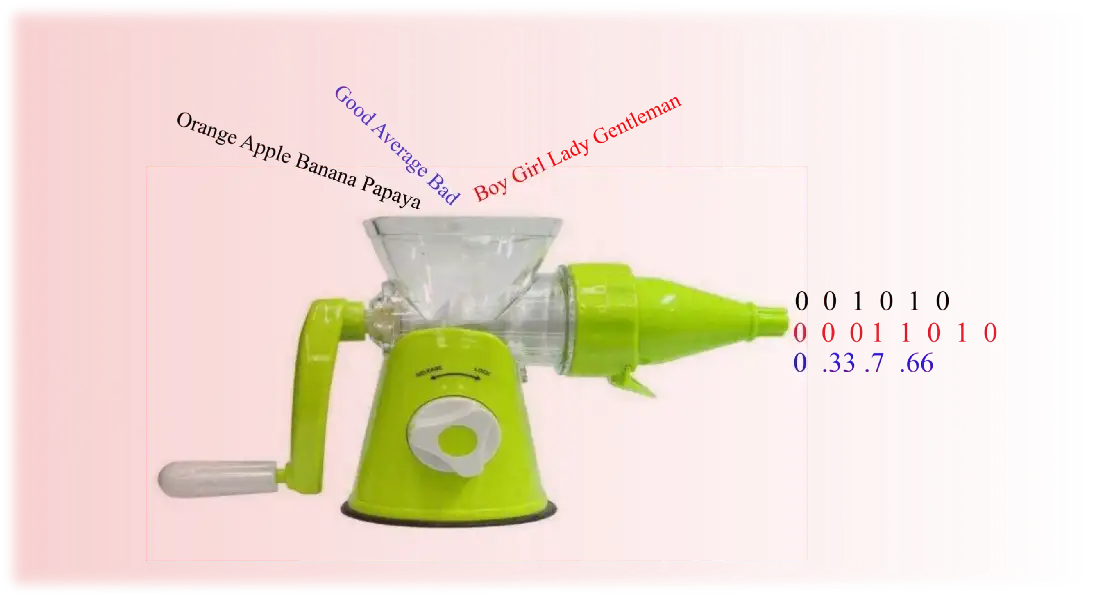

La mayoría de los modelos de Machine Learning con los que trabajaremos posteriormente, no admiten variables categóricas. Dependiendo de cómo codifiquemos estas variables, el desempeño de los modelos puede ser mejor o peor.   

Las variables categóricas se dividen en dos grupos: nominales (sin ningún orden en particular) y ordinales 

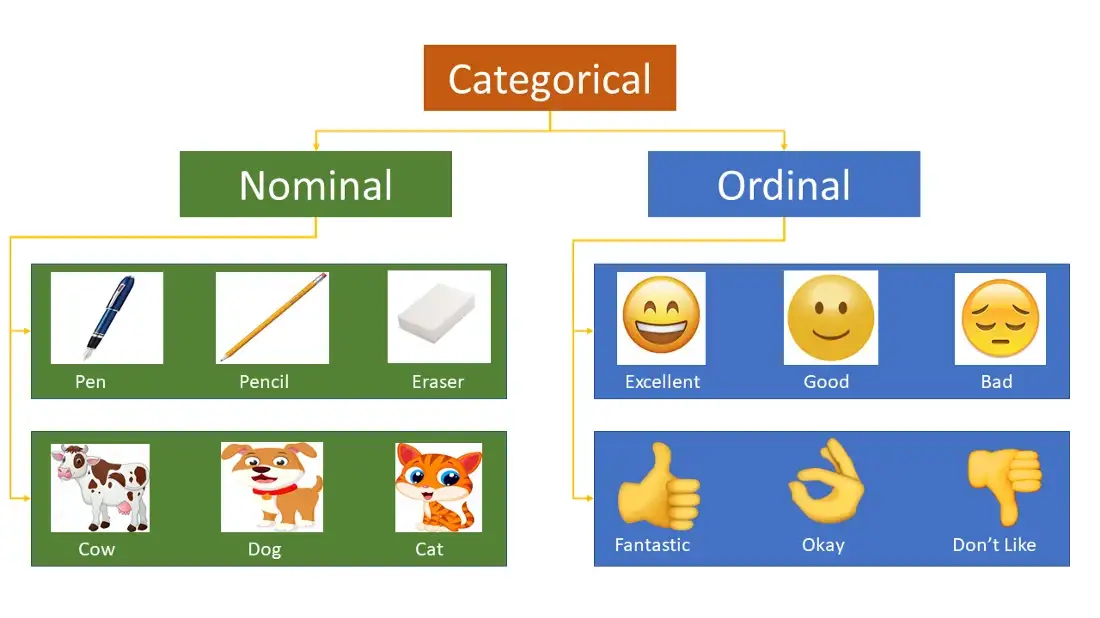

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Temperature':['Hot','Cold','Very Hot','Warm','Hot','Warm','Warm','Hot','Hot','Cold'],
       'Color':['Red','Yellow','Blue','Blue','Red','Yellow','Red','Yellow','Yellow','Yellow'],
       'Target':[1,1,1,0,1,0,1,0,1,1]})
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


### 1. One Hot Encoding
Es el método más habitual para convertir variables categóricas a numéricas. Creamos columnas binarias por cada categoría, indicando la presencia o ausencia de la variable. Este método crea una columna por cada categoría, lo que puede perjudicar el desempeño de los modelos. En pandas, usamos la función `get_dummies` para hacer el one-hot encoding.

Por ejemplo, vamos a codificar la variable Temperature:

In [3]:
pd.get_dummies(df, columns=['Temperature'], prefix=['Temp'])

,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,1,0,0
1,Yellow,1,1,0,0,0
2,Blue,1,0,0,1,0
3,Blue,0,0,0,0,1
4,Red,1,0,1,0,0
5,Yellow,0,0,0,0,1
6,Red,1,0,0,0,1
7,Yellow,0,0,1,0,0
8,Yellow,1,0,1,0,0
9,Yellow,1,1,0,0,0


Ventajas:
- Mantiene toda la información
- Fácil de implementar

Desvenatajas
- Aumenta el número de variables, lo cual no es recomendable, especialmente si hay muchas categorías
- No mantiene la relación ordinal (por ejemplo "Alto", "Medio", "Bajo")

### 2. Label Encoding
Se asigna a cada categoría un valor entre 1 y N, siendo N el número de categorías. No tiene por qué existir un orden entre las clases

In [7]:
df['Temperature_encoding'] = pd.factorize(df.Temperature)[0]
df

,Temperature,Color,Target,Temperature_encoding
0,Hot,Red,1,0
1,Cold,Yellow,1,1
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,0
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,0
8,Hot,Yellow,1,0
9,Cold,Yellow,1,1


Ventajas: 
- Fácil de implementar
- No hay pérdida de información
- No crea nuevas columnas

Desventajas:
- Un posterior algoritmo puede interpretar que hay ordinalidad en las categorías, cuando no tiene por qué ser así

### 3. Ordinal Encoding
Cuando la variable es ordinal, asociamos un número a cada categoria. Generalmente, se empieza con el 1  

En este ejemplo, tendríamos: Cold(1) < Warm(2) < Hot(3) < Very Hot(4).



In [8]:
temp_dict = {'Cold':1, 'Warm':2, 'Hot':3, 'Very Hot':4}
df['Temperature_ord'] = df.Temperature.replace(temp_dict)
df

,Temperature,Color,Target,Temperature_encoding,Temperature_ord
0,Hot,Red,1,0,3
1,Cold,Yellow,1,1,1
2,Very Hot,Blue,1,2,4
3,Warm,Blue,0,3,2
4,Hot,Red,1,0,3
5,Warm,Yellow,0,3,2
6,Warm,Red,1,3,2
7,Hot,Yellow,0,0,3
8,Hot,Yellow,1,0,3
9,Cold,Yellow,1,1,1


Ventajas:
- Fácil de implementar y no hay pérdida de datos
- No se incrementa la dimensionalidad
- No se pierde información

Desventajas:
- Puede incluir información innecesaria (por ejemplo si la usamos para codificar el género de una persona, puede interpretarse que 1 (Masculino) > 0 (Femenino) o viceversa
- No es robusto ante nuevos valores de la variable

### 4. Count / Frequency Encoding
Utiliza la frecuencia de las categorías como etiquetas.

In [11]:
count_dict = df.Temperature.value_counts().to_dict()
# to_dict() pasa una serie a un diccionario


In [12]:
frec_dict = df.Temperature.value_counts(normalize=True).to_dict()
# con el normalize=True en el value_counts me da la frecuencia
df['Temperature_freq'] = df.Temperature.replace(frec_dict)
df['Temperature_count'] = df.Temperature.replace(count_dict)
df

,Temperature,Color,Target,Temperature_encoding,Temperature_ord,Temperature_freq,Temperature_count
0,Hot,Red,1,0,3,0.4,4
1,Cold,Yellow,1,1,1,0.2,2
2,Very Hot,Blue,1,2,4,0.1,1
3,Warm,Blue,0,3,2,0.3,3
4,Hot,Red,1,0,3,0.4,4
5,Warm,Yellow,0,3,2,0.3,3
6,Warm,Red,1,3,2,0.3,3
7,Hot,Yellow,0,0,3,0.4,4
8,Hot,Yellow,1,0,3,0.4,4
9,Cold,Yellow,1,1,1,0.2,2


Ventajas:
- Fácil de implementar
- No añade dimensionalidad

Desventajas:
- Si dos categorías aparecen con la misma frecuencia, se codificarían con un mismo valor, por lo que perdemos información

### 5. Target (Mean) Encoder
Con esta técnica, reemplazamos la categoría por la media del valor del target para esa categoría

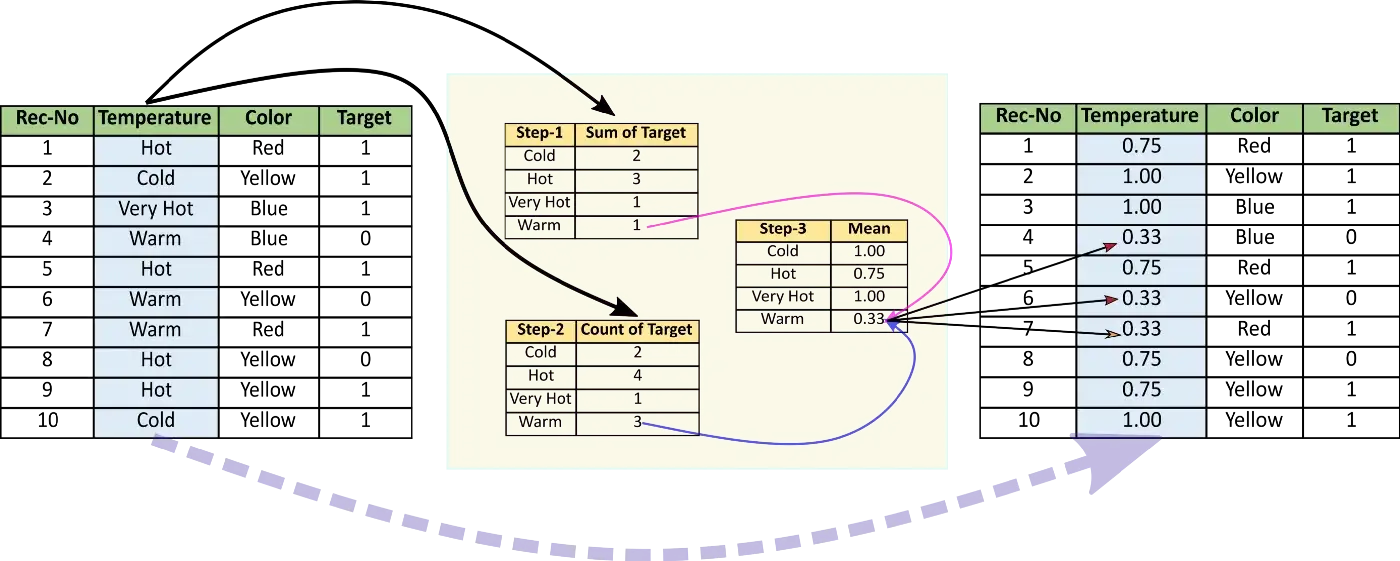


In [14]:
mean_encode = df.groupby('Temperature')['Target'].mean().to_dict()

In [15]:
df['Temperature_target'] = df.Temperature.replace(mean_encode)
df

,Temperature,Color,Target,Temperature_encoding,Temperature_ord,Temperature_freq,Temperature_count,Temperature_target
0,Hot,Red,1,0,3,0.4,4,0.750000
1,Cold,Yellow,1,1,1,0.2,2,1.000000
2,Very Hot,Blue,1,2,4,0.1,1,1.000000
3,Warm,Blue,0,3,2,0.3,3,0.333333
4,Hot,Red,1,0,3,0.4,4,0.750000
5,Warm,Yellow,0,3,2,0.3,3,0.333333
6,Warm,Red,1,3,2,0.3,3,0.333333
7,Hot,Yellow,0,0,3,0.4,4,0.750000
8,Hot,Yellow,1,0,3,0.4,4,0.750000
9,Cold,Yellow,1,1,1,0.2,2,1.000000


Ventajas:
- Fácil de implementar
- No incrementa la dimensionalidad 
- Crea una relación entre el target y la variable categórica 

Desventajas:
- Se pierde información, al poder asociar el mismo valor a dos categorías diferentes
- Puede producir overfitting en los modelos

### 6. Weight of evidence
Esta técnica indica el poder predictivo de una variable categórica con respecto a la variable objetivo. 
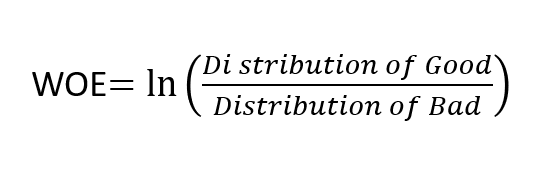

In [17]:
woe_df = df[['Temperature','Target']].groupby('Temperature',as_index=False).mean()
woe_df.rename(columns={'Target':'Good'},inplace=True)
woe_df['Bad'] = 1-woe_df.Good
woe_df['Bad'] = np.where(woe_df.Bad==0, 0.000001, woe_df.Bad)
woe_df

# Ahora ya puedo calcular el woe

woe_df['woE'] = np.log(woe_df.Good/woe_df.Bad)
woe_df

,Temperature,Good,Bad,woE
0,Cold,1.000000,0.000001,13.815511
1,Hot,0.750000,0.250000,1.098612
2,Very Hot,1.000000,0.000001,13.815511
3,Warm,0.333333,0.666667,-0.693147


In [19]:
df.merge(woe_df[['Temperature','woE']])

,Temperature,Color,Target,Temperature_encoding,Temperature_ord,Temperature_freq,Temperature_count,Temperature_target,woE
0,Hot,Red,1,0,3,0.4,4,0.750000,1.098612
1,Hot,Red,1,0,3,0.4,4,0.750000,1.098612
2,Hot,Yellow,0,0,3,0.4,4,0.750000,1.098612
3,Hot,Yellow,1,0,3,0.4,4,0.750000,1.098612
4,Cold,Yellow,1,1,1,0.2,2,1.000000,13.815511
5,Cold,Yellow,1,1,1,0.2,2,1.000000,13.815511
6,Very Hot,Blue,1,2,4,0.1,1,1.000000,13.815511
7,Warm,Blue,0,3,2,0.3,3,0.333333,-0.693147
8,Warm,Yellow,0,3,2,0.3,3,0.333333,-0.693147
9,Warm,Red,1,3,2,0.3,3,0.333333,-0.693147


Ventajas:
- No incrementa la dimensionalidad
- Permite identificar qué variable es más predictiva
- Crea una relación con el target

Desventajas:
- Pérdida de información
- Puede producir overfitting en los modelos
